# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 19.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 12.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 20.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.5 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [7]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [11]:
client = MongoClient(mongod_connect)
db = client.gp23 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5246403,-77.5633011,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Nov 20 01:11:22 +0000 2020'
'Fri Nov 20 01:11:21 +0000 2020'
'Fri Nov 20 01:11:18 +0000 2020'
'Fri Nov 20 01:11:17 +0000 2020'
'Fri Nov 20 01:11:15 +0000 2020'
'Fri Nov 20 01:11:14 +0000 2020'
'Fri Nov 20 01:11:11 +0000 2020'
'Fri Nov 20 01:11:10 +0000 2020'
'Fri Nov 20 01:11:09 +0000 2020'
'Fri Nov 20 01:11:08 +0000 2020'
'Fri Nov 20 01:11:02 +0000 2020'
'Fri Nov 20 01:11:02 +0000 2020'
'Fri Nov 20 01:11:02 +0000 2020'
'Fri Nov 20 01:11:01 +0000 2020'
'Fri Nov 20 01:10:58 +0000 2020'
'Fri Nov 20 01:10:57 +0000 2020'
'Fri Nov 20 01:10:55 +0000 2020'
'Fri Nov 20 01:10:51 +0000 2020'
'Fri Nov 20 01:10:51 +0000 2020'
'Fri Nov 20 01:10:45 +0000 2020'
'Fri Nov 20 01:10:44 +0000 2020'
'Fri Nov 20 01:10:42 +0000 2020'
'Fri Nov 20 01:10:41 +0000 2020'
'Fri Nov 20 01:10:41 +0000 2020'
'Fri Nov 20 01:10:38 +0000 2020'
'Fri Nov 20 01:10:37 +0000 2020'
'Fri Nov 20 01:10:37 +0000 2020'
'Fri Nov 20 01:10:35 +0000 2020'
'Fri Nov 20 01:10:34 +0000 2020'
'Fri Nov 20 01:10:33 +0000 2020'
'Fri Nov 2

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Nov 20 01:08:38 +0000 2020'
'Fri Nov 20 01:08:29 +0000 2020'
'Fri Nov 20 01:08:28 +0000 2020'
'Fri Nov 20 01:08:28 +0000 2020'
'Fri Nov 20 01:08:26 +0000 2020'
'Fri Nov 20 01:08:22 +0000 2020'
'Fri Nov 20 01:08:20 +0000 2020'
'Fri Nov 20 01:08:18 +0000 2020'
'Fri Nov 20 01:08:16 +0000 2020'
'Fri Nov 20 01:08:15 +0000 2020'
'Fri Nov 20 01:08:07 +0000 2020'
'Fri Nov 20 01:08:06 +0000 2020'
'Fri Nov 20 01:08:04 +0000 2020'
'Fri Nov 20 01:07:59 +0000 2020'
'Fri Nov 20 01:07:54 +0000 2020'
'Fri Nov 20 01:07:54 +0000 2020'
'Fri Nov 20 01:07:51 +0000 2020'
'Fri Nov 20 01:07:49 +0000 2020'
'Fri Nov 20 01:07:46 +0000 2020'
'Fri Nov 20 01:07:43 +0000 2020'
'Fri Nov 20 01:07:41 +0000 2020'
'Fri Nov 20 01:07:41 +0000 2020'
'Fri Nov 20 01:07:39 +0000 2020'
'Fri Nov 20 01:07:38 +0000 2020'
'Fri Nov 20 01:07:38 +0000 2020'
'Fri Nov 20 01:07:37 +0000 2020'
'Fri Nov 20 01:07:34 +0000 2020'
'Fri Nov 20 01:07:34 +0000 2020'
'Fri Nov 20 01:07:32 +0000 2020'
'Fri Nov 20 01:07:31 +0000 2020'
'Fri Nov 2

'Fri Nov 20 01:00:08 +0000 2020'
'Fri Nov 20 01:00:08 +0000 2020'
'Fri Nov 20 01:00:07 +0000 2020'
'Fri Nov 20 01:00:07 +0000 2020'
'Fri Nov 20 01:00:05 +0000 2020'
'Fri Nov 20 01:00:04 +0000 2020'
'Fri Nov 20 01:00:04 +0000 2020'
'Fri Nov 20 01:00:01 +0000 2020'
'Fri Nov 20 01:00:00 +0000 2020'
'Fri Nov 20 01:00:00 +0000 2020'
'Fri Nov 20 00:59:57 +0000 2020'
'Fri Nov 20 00:59:57 +0000 2020'
'Fri Nov 20 00:59:52 +0000 2020'
'Fri Nov 20 00:59:51 +0000 2020'
'Fri Nov 20 00:59:51 +0000 2020'
'Fri Nov 20 00:59:47 +0000 2020'
'Fri Nov 20 00:59:44 +0000 2020'
'Fri Nov 20 00:59:42 +0000 2020'
'Fri Nov 20 00:59:37 +0000 2020'
'Fri Nov 20 00:59:36 +0000 2020'
'Fri Nov 20 00:59:36 +0000 2020'
'Fri Nov 20 00:59:36 +0000 2020'
'Fri Nov 20 00:59:35 +0000 2020'
'Fri Nov 20 00:59:35 +0000 2020'
'Fri Nov 20 00:59:34 +0000 2020'
'Fri Nov 20 00:59:34 +0000 2020'
'Fri Nov 20 00:59:32 +0000 2020'
'Fri Nov 20 00:59:31 +0000 2020'
'Fri Nov 20 00:59:30 +0000 2020'
'Fri Nov 20 00:59:30 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:52:17 +0000 2020'
'Fri Nov 20 00:52:15 +0000 2020'
'Fri Nov 20 00:52:15 +0000 2020'
'Fri Nov 20 00:52:06 +0000 2020'
'Fri Nov 20 00:52:05 +0000 2020'
'Fri Nov 20 00:52:04 +0000 2020'
'Fri Nov 20 00:52:04 +0000 2020'
'Fri Nov 20 00:52:03 +0000 2020'
'Fri Nov 20 00:52:02 +0000 2020'
'Fri Nov 20 00:52:00 +0000 2020'
'Fri Nov 20 00:51:59 +0000 2020'
'Fri Nov 20 00:51:57 +0000 2020'
'Fri Nov 20 00:51:55 +0000 2020'
'Fri Nov 20 00:51:54 +0000 2020'
'Fri Nov 20 00:51:50 +0000 2020'
'Fri Nov 20 00:51:48 +0000 2020'
'Fri Nov 20 00:51:48 +0000 2020'
'Fri Nov 20 00:51:47 +0000 2020'
'Fri Nov 20 00:51:45 +0000 2020'
'Fri Nov 20 00:51:41 +0000 2020'
'Fri Nov 20 00:51:41 +0000 2020'
'Fri Nov 20 00:51:40 +0000 2020'
'Fri Nov 20 00:51:39 +0000 2020'
'Fri Nov 20 00:51:36 +0000 2020'
'Fri Nov 20 00:51:34 +0000 2020'
'Fri Nov 20 00:51:34 +0000 2020'
'Fri Nov 20 00:51:32 +0000 2020'
'Fri Nov 20 00:51:30 +0000 2020'
'Fri Nov 20 00:51:29 +0000 2020'
'Fri Nov 20 00:51:29 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:45:18 +0000 2020'
'Fri Nov 20 00:45:17 +0000 2020'
'Fri Nov 20 00:45:16 +0000 2020'
'Fri Nov 20 00:45:13 +0000 2020'
'Fri Nov 20 00:45:12 +0000 2020'
'Fri Nov 20 00:45:10 +0000 2020'
'Fri Nov 20 00:45:03 +0000 2020'
'Fri Nov 20 00:44:59 +0000 2020'
'Fri Nov 20 00:44:58 +0000 2020'
'Fri Nov 20 00:44:58 +0000 2020'
'Fri Nov 20 00:44:56 +0000 2020'
'Fri Nov 20 00:44:56 +0000 2020'
'Fri Nov 20 00:44:53 +0000 2020'
'Fri Nov 20 00:44:50 +0000 2020'
'Fri Nov 20 00:44:49 +0000 2020'
'Fri Nov 20 00:44:48 +0000 2020'
'Fri Nov 20 00:44:46 +0000 2020'
'Fri Nov 20 00:44:46 +0000 2020'
'Fri Nov 20 00:44:45 +0000 2020'
'Fri Nov 20 00:44:44 +0000 2020'
'Fri Nov 20 00:44:43 +0000 2020'
'Fri Nov 20 00:44:41 +0000 2020'
'Fri Nov 20 00:44:38 +0000 2020'
'Fri Nov 20 00:44:34 +0000 2020'
'Fri Nov 20 00:44:32 +0000 2020'
'Fri Nov 20 00:44:30 +0000 2020'
'Fri Nov 20 00:44:28 +0000 2020'
'Fri Nov 20 00:44:27 +0000 2020'
'Fri Nov 20 00:44:25 +0000 2020'
'Fri Nov 20 00:44:25 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:38:24 +0000 2020'
'Fri Nov 20 00:38:24 +0000 2020'
'Fri Nov 20 00:38:23 +0000 2020'
'Fri Nov 20 00:38:22 +0000 2020'
'Fri Nov 20 00:38:20 +0000 2020'
'Fri Nov 20 00:38:19 +0000 2020'
'Fri Nov 20 00:38:18 +0000 2020'
'Fri Nov 20 00:38:13 +0000 2020'
'Fri Nov 20 00:38:13 +0000 2020'
'Fri Nov 20 00:38:13 +0000 2020'
'Fri Nov 20 00:38:12 +0000 2020'
'Fri Nov 20 00:38:11 +0000 2020'
'Fri Nov 20 00:38:11 +0000 2020'
'Fri Nov 20 00:38:07 +0000 2020'
'Fri Nov 20 00:38:03 +0000 2020'
'Fri Nov 20 00:38:03 +0000 2020'
'Fri Nov 20 00:38:03 +0000 2020'
'Fri Nov 20 00:38:02 +0000 2020'
'Fri Nov 20 00:38:01 +0000 2020'
'Fri Nov 20 00:38:00 +0000 2020'
'Fri Nov 20 00:37:58 +0000 2020'
'Fri Nov 20 00:37:57 +0000 2020'
'Fri Nov 20 00:37:57 +0000 2020'
'Fri Nov 20 00:37:56 +0000 2020'
'Fri Nov 20 00:37:53 +0000 2020'
'Fri Nov 20 00:37:52 +0000 2020'
'Fri Nov 20 00:37:52 +0000 2020'
'Fri Nov 20 00:37:52 +0000 2020'
'Fri Nov 20 00:37:48 +0000 2020'
'Fri Nov 20 00:37:47 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:32:15 +0000 2020'
'Fri Nov 20 00:32:15 +0000 2020'
'Fri Nov 20 00:32:12 +0000 2020'
'Fri Nov 20 00:32:10 +0000 2020'
'Fri Nov 20 00:32:07 +0000 2020'
'Fri Nov 20 00:32:06 +0000 2020'
'Fri Nov 20 00:32:06 +0000 2020'
'Fri Nov 20 00:32:05 +0000 2020'
'Fri Nov 20 00:32:03 +0000 2020'
'Fri Nov 20 00:32:02 +0000 2020'
'Fri Nov 20 00:32:01 +0000 2020'
'Fri Nov 20 00:32:01 +0000 2020'
'Fri Nov 20 00:32:00 +0000 2020'
'Fri Nov 20 00:31:59 +0000 2020'
'Fri Nov 20 00:31:58 +0000 2020'
'Fri Nov 20 00:31:58 +0000 2020'
'Fri Nov 20 00:31:56 +0000 2020'
'Fri Nov 20 00:31:56 +0000 2020'
'Fri Nov 20 00:31:51 +0000 2020'
'Fri Nov 20 00:31:49 +0000 2020'
'Fri Nov 20 00:31:49 +0000 2020'
'Fri Nov 20 00:31:48 +0000 2020'
'Fri Nov 20 00:31:42 +0000 2020'
'Fri Nov 20 00:31:40 +0000 2020'
'Fri Nov 20 00:31:39 +0000 2020'
'Fri Nov 20 00:31:39 +0000 2020'
'Fri Nov 20 00:31:38 +0000 2020'
'Fri Nov 20 00:31:36 +0000 2020'
'Fri Nov 20 00:31:36 +0000 2020'
'Fri Nov 20 00:31:34 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:27:14 +0000 2020'
'Fri Nov 20 00:27:14 +0000 2020'
'Fri Nov 20 00:27:11 +0000 2020'
'Fri Nov 20 00:27:07 +0000 2020'
'Fri Nov 20 00:27:05 +0000 2020'
'Fri Nov 20 00:27:05 +0000 2020'
'Fri Nov 20 00:27:05 +0000 2020'
'Fri Nov 20 00:27:04 +0000 2020'
'Fri Nov 20 00:27:03 +0000 2020'
'Fri Nov 20 00:27:01 +0000 2020'
'Fri Nov 20 00:27:01 +0000 2020'
'Fri Nov 20 00:27:00 +0000 2020'
'Fri Nov 20 00:26:59 +0000 2020'
'Fri Nov 20 00:26:59 +0000 2020'
'Fri Nov 20 00:26:58 +0000 2020'
'Fri Nov 20 00:26:58 +0000 2020'
'Fri Nov 20 00:26:58 +0000 2020'
'Fri Nov 20 00:26:57 +0000 2020'
'Fri Nov 20 00:26:55 +0000 2020'
'Fri Nov 20 00:26:53 +0000 2020'
'Fri Nov 20 00:26:53 +0000 2020'
'Fri Nov 20 00:26:48 +0000 2020'
'Fri Nov 20 00:26:47 +0000 2020'
'Fri Nov 20 00:26:46 +0000 2020'
'Fri Nov 20 00:26:46 +0000 2020'
'Fri Nov 20 00:26:45 +0000 2020'
'Fri Nov 20 00:26:44 +0000 2020'
'Fri Nov 20 00:26:44 +0000 2020'
'Fri Nov 20 00:26:44 +0000 2020'
'Fri Nov 20 00:26:43 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:21:35 +0000 2020'
'Fri Nov 20 00:21:35 +0000 2020'
'Fri Nov 20 00:21:32 +0000 2020'
'Fri Nov 20 00:21:32 +0000 2020'
'Fri Nov 20 00:21:31 +0000 2020'
'Fri Nov 20 00:21:30 +0000 2020'
'Fri Nov 20 00:21:29 +0000 2020'
'Fri Nov 20 00:21:28 +0000 2020'
'Fri Nov 20 00:21:27 +0000 2020'
'Fri Nov 20 00:21:26 +0000 2020'
'Fri Nov 20 00:21:24 +0000 2020'
'Fri Nov 20 00:21:23 +0000 2020'
'Fri Nov 20 00:21:22 +0000 2020'
'Fri Nov 20 00:21:21 +0000 2020'
'Fri Nov 20 00:21:21 +0000 2020'
'Fri Nov 20 00:21:20 +0000 2020'
'Fri Nov 20 00:21:20 +0000 2020'
'Fri Nov 20 00:21:19 +0000 2020'
'Fri Nov 20 00:21:19 +0000 2020'
'Fri Nov 20 00:21:19 +0000 2020'
'Fri Nov 20 00:21:18 +0000 2020'
'Fri Nov 20 00:21:17 +0000 2020'
'Fri Nov 20 00:21:17 +0000 2020'
'Fri Nov 20 00:21:15 +0000 2020'
'Fri Nov 20 00:21:14 +0000 2020'
'Fri Nov 20 00:21:14 +0000 2020'
'Fri Nov 20 00:21:13 +0000 2020'
'Fri Nov 20 00:21:13 +0000 2020'
'Fri Nov 20 00:21:13 +0000 2020'
'Fri Nov 20 00:21:13 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:17:42 +0000 2020'
'Fri Nov 20 00:17:41 +0000 2020'
'Fri Nov 20 00:17:41 +0000 2020'
'Fri Nov 20 00:17:40 +0000 2020'
'Fri Nov 20 00:17:40 +0000 2020'
'Fri Nov 20 00:17:40 +0000 2020'
'Fri Nov 20 00:17:39 +0000 2020'
'Fri Nov 20 00:17:38 +0000 2020'
'Fri Nov 20 00:17:38 +0000 2020'
'Fri Nov 20 00:17:37 +0000 2020'
'Fri Nov 20 00:17:36 +0000 2020'
'Fri Nov 20 00:17:36 +0000 2020'
'Fri Nov 20 00:17:36 +0000 2020'
'Fri Nov 20 00:17:35 +0000 2020'
'Fri Nov 20 00:17:35 +0000 2020'
'Fri Nov 20 00:17:34 +0000 2020'
'Fri Nov 20 00:17:34 +0000 2020'
'Fri Nov 20 00:17:33 +0000 2020'
'Fri Nov 20 00:17:31 +0000 2020'
'Fri Nov 20 00:17:31 +0000 2020'
'Fri Nov 20 00:17:30 +0000 2020'
'Fri Nov 20 00:17:30 +0000 2020'
'Fri Nov 20 00:17:28 +0000 2020'
'Fri Nov 20 00:17:28 +0000 2020'
'Fri Nov 20 00:17:28 +0000 2020'
'Fri Nov 20 00:17:27 +0000 2020'
'Fri Nov 20 00:17:27 +0000 2020'
'Fri Nov 20 00:17:27 +0000 2020'
'Fri Nov 20 00:17:25 +0000 2020'
'Fri Nov 20 00:17:25 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:14:10 +0000 2020'
'Fri Nov 20 00:14:09 +0000 2020'
'Fri Nov 20 00:14:08 +0000 2020'
'Fri Nov 20 00:14:08 +0000 2020'
'Fri Nov 20 00:14:07 +0000 2020'
'Fri Nov 20 00:14:04 +0000 2020'
'Fri Nov 20 00:14:04 +0000 2020'
'Fri Nov 20 00:14:03 +0000 2020'
'Fri Nov 20 00:14:03 +0000 2020'
'Fri Nov 20 00:14:02 +0000 2020'
'Fri Nov 20 00:14:00 +0000 2020'
'Fri Nov 20 00:13:57 +0000 2020'
'Fri Nov 20 00:13:56 +0000 2020'
'Fri Nov 20 00:13:56 +0000 2020'
'Fri Nov 20 00:13:55 +0000 2020'
'Fri Nov 20 00:13:55 +0000 2020'
'Fri Nov 20 00:13:54 +0000 2020'
'Fri Nov 20 00:13:54 +0000 2020'
'Fri Nov 20 00:13:53 +0000 2020'
'Fri Nov 20 00:13:52 +0000 2020'
'Fri Nov 20 00:13:52 +0000 2020'
'Fri Nov 20 00:13:51 +0000 2020'
'Fri Nov 20 00:13:51 +0000 2020'
'Fri Nov 20 00:13:50 +0000 2020'
'Fri Nov 20 00:13:49 +0000 2020'
'Fri Nov 20 00:13:46 +0000 2020'
'Fri Nov 20 00:13:46 +0000 2020'
'Fri Nov 20 00:13:45 +0000 2020'
'Fri Nov 20 00:13:44 +0000 2020'
'Fri Nov 20 00:13:44 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:10:37 +0000 2020'
'Fri Nov 20 00:10:36 +0000 2020'
'Fri Nov 20 00:10:36 +0000 2020'
'Fri Nov 20 00:10:35 +0000 2020'
'Fri Nov 20 00:10:34 +0000 2020'
'Fri Nov 20 00:10:32 +0000 2020'
'Fri Nov 20 00:10:32 +0000 2020'
'Fri Nov 20 00:10:31 +0000 2020'
'Fri Nov 20 00:10:30 +0000 2020'
'Fri Nov 20 00:10:28 +0000 2020'
'Fri Nov 20 00:10:27 +0000 2020'
'Fri Nov 20 00:10:27 +0000 2020'
'Fri Nov 20 00:10:26 +0000 2020'
'Fri Nov 20 00:10:25 +0000 2020'
'Fri Nov 20 00:10:24 +0000 2020'
'Fri Nov 20 00:10:24 +0000 2020'
'Fri Nov 20 00:10:24 +0000 2020'
'Fri Nov 20 00:10:24 +0000 2020'
'Fri Nov 20 00:10:23 +0000 2020'
'Fri Nov 20 00:10:22 +0000 2020'
'Fri Nov 20 00:10:22 +0000 2020'
'Fri Nov 20 00:10:22 +0000 2020'
'Fri Nov 20 00:10:21 +0000 2020'
'Fri Nov 20 00:10:20 +0000 2020'
'Fri Nov 20 00:10:20 +0000 2020'
'Fri Nov 20 00:10:19 +0000 2020'
'Fri Nov 20 00:10:19 +0000 2020'
'Fri Nov 20 00:10:19 +0000 2020'
'Fri Nov 20 00:10:18 +0000 2020'
'Fri Nov 20 00:10:17 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:07:54 +0000 2020'
'Fri Nov 20 00:07:54 +0000 2020'
'Fri Nov 20 00:07:54 +0000 2020'
'Fri Nov 20 00:07:53 +0000 2020'
'Fri Nov 20 00:07:53 +0000 2020'
'Fri Nov 20 00:07:52 +0000 2020'
'Fri Nov 20 00:07:51 +0000 2020'
'Fri Nov 20 00:07:51 +0000 2020'
'Fri Nov 20 00:07:50 +0000 2020'
'Fri Nov 20 00:07:49 +0000 2020'
'Fri Nov 20 00:07:47 +0000 2020'
'Fri Nov 20 00:07:47 +0000 2020'
'Fri Nov 20 00:07:47 +0000 2020'
'Fri Nov 20 00:07:46 +0000 2020'
'Fri Nov 20 00:07:45 +0000 2020'
'Fri Nov 20 00:07:45 +0000 2020'
'Fri Nov 20 00:07:44 +0000 2020'
'Fri Nov 20 00:07:43 +0000 2020'
'Fri Nov 20 00:07:43 +0000 2020'
'Fri Nov 20 00:07:42 +0000 2020'
'Fri Nov 20 00:07:42 +0000 2020'
'Fri Nov 20 00:07:42 +0000 2020'
'Fri Nov 20 00:07:42 +0000 2020'
'Fri Nov 20 00:07:41 +0000 2020'
'Fri Nov 20 00:07:41 +0000 2020'
'Fri Nov 20 00:07:41 +0000 2020'
'Fri Nov 20 00:07:40 +0000 2020'
'Fri Nov 20 00:07:40 +0000 2020'
'Fri Nov 20 00:07:40 +0000 2020'
'Fri Nov 20 00:07:40 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:05:32 +0000 2020'
'Fri Nov 20 00:05:31 +0000 2020'
'Fri Nov 20 00:05:31 +0000 2020'
'Fri Nov 20 00:05:31 +0000 2020'
'Fri Nov 20 00:05:31 +0000 2020'
'Fri Nov 20 00:05:31 +0000 2020'
'Fri Nov 20 00:05:31 +0000 2020'
'Fri Nov 20 00:05:31 +0000 2020'
'Fri Nov 20 00:05:30 +0000 2020'
'Fri Nov 20 00:05:30 +0000 2020'
'Fri Nov 20 00:05:30 +0000 2020'
'Fri Nov 20 00:05:30 +0000 2020'
'Fri Nov 20 00:05:29 +0000 2020'
'Fri Nov 20 00:05:29 +0000 2020'
'Fri Nov 20 00:05:29 +0000 2020'
'Fri Nov 20 00:05:28 +0000 2020'
'Fri Nov 20 00:05:28 +0000 2020'
'Fri Nov 20 00:05:28 +0000 2020'
'Fri Nov 20 00:05:26 +0000 2020'
'Fri Nov 20 00:05:26 +0000 2020'
'Fri Nov 20 00:05:25 +0000 2020'
'Fri Nov 20 00:05:25 +0000 2020'
'Fri Nov 20 00:05:25 +0000 2020'
'Fri Nov 20 00:05:24 +0000 2020'
'Fri Nov 20 00:05:24 +0000 2020'
'Fri Nov 20 00:05:24 +0000 2020'
'Fri Nov 20 00:05:24 +0000 2020'
'Fri Nov 20 00:05:23 +0000 2020'
'Fri Nov 20 00:05:23 +0000 2020'
'Fri Nov 20 00:05:22 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:04:02 +0000 2020'
'Fri Nov 20 00:04:02 +0000 2020'
'Fri Nov 20 00:04:02 +0000 2020'
'Fri Nov 20 00:04:02 +0000 2020'
'Fri Nov 20 00:04:01 +0000 2020'
'Fri Nov 20 00:04:00 +0000 2020'
'Fri Nov 20 00:04:00 +0000 2020'
'Fri Nov 20 00:03:59 +0000 2020'
'Fri Nov 20 00:03:59 +0000 2020'
'Fri Nov 20 00:03:59 +0000 2020'
'Fri Nov 20 00:03:58 +0000 2020'
'Fri Nov 20 00:03:58 +0000 2020'
'Fri Nov 20 00:03:58 +0000 2020'
'Fri Nov 20 00:03:57 +0000 2020'
'Fri Nov 20 00:03:57 +0000 2020'
'Fri Nov 20 00:03:57 +0000 2020'
'Fri Nov 20 00:03:57 +0000 2020'
'Fri Nov 20 00:03:56 +0000 2020'
'Fri Nov 20 00:03:56 +0000 2020'
'Fri Nov 20 00:03:56 +0000 2020'
'Fri Nov 20 00:03:56 +0000 2020'
'Fri Nov 20 00:03:55 +0000 2020'
'Fri Nov 20 00:03:55 +0000 2020'
'Fri Nov 20 00:03:55 +0000 2020'
'Fri Nov 20 00:03:55 +0000 2020'
'Fri Nov 20 00:03:54 +0000 2020'
'Fri Nov 20 00:03:54 +0000 2020'
'Fri Nov 20 00:03:53 +0000 2020'
'Fri Nov 20 00:03:53 +0000 2020'
'Fri Nov 20 00:03:53 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:03:05 +0000 2020'
'Fri Nov 20 00:03:05 +0000 2020'
'Fri Nov 20 00:03:05 +0000 2020'
'Fri Nov 20 00:03:04 +0000 2020'
'Fri Nov 20 00:03:04 +0000 2020'
'Fri Nov 20 00:03:04 +0000 2020'
'Fri Nov 20 00:03:04 +0000 2020'
'Fri Nov 20 00:03:03 +0000 2020'
'Fri Nov 20 00:03:03 +0000 2020'
'Fri Nov 20 00:03:03 +0000 2020'
'Fri Nov 20 00:03:02 +0000 2020'
'Fri Nov 20 00:03:01 +0000 2020'
'Fri Nov 20 00:03:01 +0000 2020'
'Fri Nov 20 00:03:01 +0000 2020'
'Fri Nov 20 00:03:01 +0000 2020'
'Fri Nov 20 00:03:00 +0000 2020'
'Fri Nov 20 00:03:00 +0000 2020'
'Fri Nov 20 00:03:00 +0000 2020'
'Fri Nov 20 00:03:00 +0000 2020'
'Fri Nov 20 00:02:59 +0000 2020'
'Fri Nov 20 00:02:59 +0000 2020'
'Fri Nov 20 00:02:59 +0000 2020'
'Fri Nov 20 00:02:59 +0000 2020'
'Fri Nov 20 00:02:58 +0000 2020'
'Fri Nov 20 00:02:58 +0000 2020'
'Fri Nov 20 00:02:58 +0000 2020'
'Fri Nov 20 00:02:58 +0000 2020'
'Fri Nov 20 00:02:58 +0000 2020'
'Fri Nov 20 00:02:57 +0000 2020'
'Fri Nov 20 00:02:57 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:01:58 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:57 +0000 2020'
'Fri Nov 20 00:01:56 +0000 2020'
'Fri Nov 20 00:01:56 +0000 2020'
'Fri Nov 20 00:01:56 +0000 2020'
'Fri Nov 20 00:01:56 +0000 2020'
'Fri Nov 20 00:01:55 +0000 2020'
'Fri Nov 20 00:01:55 +0000 2020'
'Fri Nov 20 00:01:55 +0000 2020'
'Fri Nov 20 00:01:55 +0000 2020'
'Fri Nov 20 00:01:55 +0000 2020'
'Fri Nov 20 00:01:55 +0000 2020'
'Fri Nov 20 00:01:54 +0000 2020'
'Fri Nov 20 00:01:54 +0000 2020'
'Fri Nov 20 00:01:54 +0000 2020'
'Fri Nov 20 00:01:54 +0000 2020'
'Fri Nov 20 00:01:54 +0000 2020'
'Fri Nov 20 00:01:53 +0000 2020'
'Fri Nov 20 00:01:53 +0000 2020'
'Fri Nov 20 00:01:53 +0000 2020'
'Fri Nov 20 00:01:53 +0000 2020'
'Fri Nov 20 00:01:52 +0000 2020'
'Fri Nov 20 00:01:52 +0000 2020'
'Fri Nov 2

'Fri Nov 20 00:00:27 +0000 2020'
'Fri Nov 20 00:00:27 +0000 2020'
'Fri Nov 20 00:00:26 +0000 2020'
'Fri Nov 20 00:00:26 +0000 2020'
'Fri Nov 20 00:00:25 +0000 2020'
'Fri Nov 20 00:00:24 +0000 2020'
'Fri Nov 20 00:00:24 +0000 2020'
'Fri Nov 20 00:00:24 +0000 2020'
'Fri Nov 20 00:00:23 +0000 2020'
'Fri Nov 20 00:00:23 +0000 2020'
'Fri Nov 20 00:00:23 +0000 2020'
'Fri Nov 20 00:00:22 +0000 2020'
'Fri Nov 20 00:00:19 +0000 2020'
'Fri Nov 20 00:00:18 +0000 2020'
'Fri Nov 20 00:00:18 +0000 2020'
'Fri Nov 20 00:00:17 +0000 2020'
'Fri Nov 20 00:00:16 +0000 2020'
'Fri Nov 20 00:00:15 +0000 2020'
'Fri Nov 20 00:00:15 +0000 2020'
'Fri Nov 20 00:00:13 +0000 2020'
'Fri Nov 20 00:00:09 +0000 2020'
'Fri Nov 20 00:00:08 +0000 2020'
'Fri Nov 20 00:00:07 +0000 2020'
'Fri Nov 20 00:00:06 +0000 2020'
'Fri Nov 20 00:00:06 +0000 2020'
'Fri Nov 20 00:00:05 +0000 2020'
'Fri Nov 20 00:00:03 +0000 2020'
'Fri Nov 20 00:00:03 +0000 2020'
'Fri Nov 20 00:00:03 +0000 2020'
'Fri Nov 20 00:00:03 +0000 2020'
'Fri Nov 2

'Thu Nov 19 23:52:24 +0000 2020'
'Thu Nov 19 23:52:23 +0000 2020'
'Thu Nov 19 23:52:18 +0000 2020'
'Thu Nov 19 23:52:18 +0000 2020'
'Thu Nov 19 23:52:14 +0000 2020'
'Thu Nov 19 23:52:11 +0000 2020'
'Thu Nov 19 23:52:07 +0000 2020'
'Thu Nov 19 23:52:07 +0000 2020'
'Thu Nov 19 23:52:04 +0000 2020'
'Thu Nov 19 23:52:00 +0000 2020'
'Thu Nov 19 23:52:00 +0000 2020'
'Thu Nov 19 23:51:59 +0000 2020'
'Thu Nov 19 23:51:58 +0000 2020'
'Thu Nov 19 23:51:57 +0000 2020'
'Thu Nov 19 23:51:55 +0000 2020'
'Thu Nov 19 23:51:47 +0000 2020'
'Thu Nov 19 23:51:47 +0000 2020'
'Thu Nov 19 23:51:46 +0000 2020'
'Thu Nov 19 23:51:43 +0000 2020'
'Thu Nov 19 23:51:43 +0000 2020'
'Thu Nov 19 23:51:40 +0000 2020'
'Thu Nov 19 23:51:37 +0000 2020'
'Thu Nov 19 23:51:37 +0000 2020'
'Thu Nov 19 23:51:36 +0000 2020'
'Thu Nov 19 23:51:32 +0000 2020'
'Thu Nov 19 23:51:31 +0000 2020'
'Thu Nov 19 23:51:28 +0000 2020'
'Thu Nov 19 23:51:27 +0000 2020'
'Thu Nov 19 23:51:22 +0000 2020'
'Thu Nov 19 23:51:20 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4654
4610


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Maureen McCulley
text: #COVID19 https://t.co/zdMzL69mKJ
----
name: nick price
text: Pence blames the media for the #COVID19 surge? #TheReidOut
----
name: ASE RAY OF LIGHT
text: #COVID19 #TransitionNow https://t.co/pYs7DIfi4p
----
name: Jack Torry
text: #COVID19 @pfizer @moderna_tx https://t.co/Uvsn8TEvbZ
----
name: David Jack
text: A Christmas nightmare #Covid19 https://t.co/QwxZlxaEZi
----
name: Petra Meyer
text: RT @Vote_CNP: Viruses don't care what you believe. #Covid #Covid19
----
name: NW Wanderer
text: I’m old enough to remember Tiger King... #Covid19
----
name: Wanderer
text: RT @dcbat: Does #DonaldTrump deserve credit for any #COVID19 #vaccines?
----
name: Meghan
text: #ElPaso #Texas #COVID19
https://t.co/KoDg0Oz8bz
----
name: Debbie Nunn
text: RT @dcbat: Does #DonaldTrump deserve credit for any #COVID19 #vaccines?


In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
0,5fb71807370f80c5e463178e,Fri Nov 20 00:43:20 +0000 2020,1329586085794631680,1329586085794631680,#COVID19 https://t.co/zdMzL69mKJ,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1329585571736457220,{'created_at': 'Fri Nov 20 00:41:17 +0000 2020...,0,0,False,False,True,und,NaN,NaN
1,5fb71808370f80c5e4631813,Fri Nov 20 00:40:13 +0000 2020,1329585305142390784,1329585305142390784,Pence blames the media for the #COVID19 surge?...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,0,0,False,False,NaN,en,NaN,NaN
2,5fb717bc370f80c5e46313d8,Fri Nov 20 01:10:55 +0000 2020,1329593029242494976,1329593029242494976,#COVID19 #TransitionNow https://t.co/pYs7DIfi4p,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1329589228595015685,{'created_at': 'Fri Nov 20 00:55:49 +0000 2020...,0,0,False,False,False,und,NaN,NaN
3,5fb7182f370f80c5e463259d,Thu Nov 19 23:54:41 +0000 2020,1329573846488330246,1329573846488330246,#COVID19 @pfizer @moderna_tx https://t.co/Uvsn...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1329571950843359238,{'created_at': 'Thu Nov 19 23:47:09 +0000 2020...,0,0,False,False,False,und,NaN,NaN
4,5fb7182f370f80c5e4632599,Thu Nov 19 23:54:51 +0000 2020,1329573886338457600,1329573886338457600,A Christmas nightmare #Covid19 https://t.co/Qw...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,2,4,False,False,False,en,"{'media': [{'id': 1329573882437787648, 'id_str...",NaN
5,5fb7182c370f80c5e463248f,Fri Nov 20 00:01:00 +0000 2020,1329575433340239873,1329575433340239873,RT @Vote_CNP: Viruses don't care what you beli...,False,"{'hashtags': [{'text': 'Covid', 'indices': [51...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1329086088263081985,NaN,6,0,False,False,NaN,en,NaN,{'created_at': 'Wed Nov 18 16:21:54 +0000 2020...
6,5fb71809370f80c5e4631856,Fri Nov 20 00:38:32 +0000 2020,1329584878548111361,1329584878548111361,I’m old enough to remember Tiger King... #Covid19,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,0,0,False,False,NaN,en,NaN,NaN
7,5fb71809370f80c5e4631827,Fri Nov 20 00:39:46 +0000 2020,1329585191443189762,1329585191443189762,RT @dcbat: Does #DonaldTrump deserve credit fo...,False,"{'hashtags': [{'text': 'DonaldTrump', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,23,0,False,False,NaN,en,NaN,{'created_at': 'Thu Nov 19 01:19:04 +0000 2020...
8,5fb71803370f80c5e4631672,Fri Nov 20 00:51:05 +0000 2020,1329588038008152064,1329588038008152064,#ElPaso #Texas #COVID19\nhttps://t.co/KoDg0Oz8bz,False,"{'hashtags': [{'text': 'ElPaso', 'indices': [0...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,0,0,False,False,False,und,NaN,NaN
9,5fb717fe370f80c5e46314e2,Fri Nov 20 01:02:46 +0000 2020,1329590979662393344,1329590979662393344,RT @dcbat: Does #DonaldTrump deserve credit fo...,False,"{'hashtags': [{'text': 'DonaldTrump', 'in

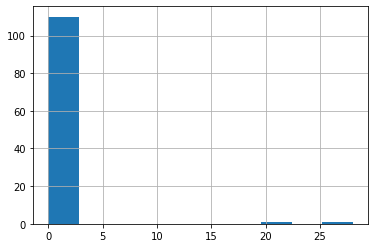

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count